<a href="https://colab.research.google.com/github/wodnjse/machine-learning/blob/main/machine_learning_6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **군집 알고리즘** 
###- 비지도 학습, 히스토그램, 군집

## **시작하기 전에**
1. 고객이 사고 싶은 과일 사진을 보냄
2. 그 중 가장 많이 요청하는 과일을 판매 품목으로 선정
3. 1위로 선정된 과일 사진을 보낸 고객 중 몇 명 뽑아 이벤트 당첨자로 선정
4. 고객이 올린 사진을 사람이 하나씩 분류하기 어려움
5. 생선처럼 미리 과일 분류기를 훈련하기에는 고객들이 어떤 과일 사진을 보낸지 알 수 없음
6. <font color= #F06E5E>사진에 대한 정답(타깃)을 알지 못하는데</font> 어떻게 이 사진을 <font color= #F06E5E>종류대로 모을 수 있을까?
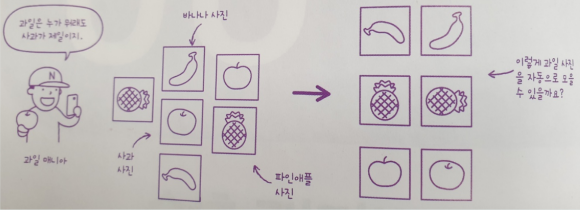

## **타깃을 모르는 비지도 학습**

- 타깃을 모르는 사진을 종류별로 분류 필요
- <font color= #F9D923>비지도 학습</font> (unsupervised learning)
  - <font color= #F9D923>타깃이 없을 때</font> 사용하는 머신러닝 알고리즘
  - <font color= #F9D923>사람이 가르쳐 주지 않아도</font> 데이터에 있는 무언가를 학습

> 1. 사진의 <font color="#ff0000">픽셀값을 모두 평균</font> 내면 비슷한 과일끼리 모일까?
2. 모델을 만들기 위해 개발 팀에서 사진 300장 확보
  
→ 데이터를 준비하고 <font color="#ff0000">픽셀값을 이용해서 사진을 분류</font>

## ** 과일 사진 데이터 준비

- 과일 데이터: <font color= #F9D923>사과, 바나나, 파인애플</font>을 담고 있는 흑백 사진
- 넘파이 배열의 기본 저장 포맷인 <font color= #F9D923>npy 파일</font>로 저장
- 캐글에 공개된 데이터셋 중 일부 발췌

In [9]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-08-29 02:47:07--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-08-29 02:47:07--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-08-29 02:47:08--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... conne

## **손코딩**
- load() 메서드: 넘파이에서 npy 파일 로드
- 배열의 크기 확인: 300, 100, 100
- 첫 번째 차원(300): <font color= #F9D923>샘플의 개수</font>
- 두 번째 차원(100): <font color= #F9D923>이미지 높이</font>
- 세 번째 차원(100): <font color= #F9D923>이미지 너비</font>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
fruits = np.load('fruits_300.npy')
fruits.shape

(300, 100, 100)

> 이미지 크기는 100 x 100 pixel  

> 각 픽셀은 넘파이 배열의 원소 하나에 대응  

> 배열의 크기가 100 x 100

첫 번째 이미지의 첫 번째 행 출력
3차원 배열
- 처음 2개의 인덱스를 0으로 지정
- 마지막 인덱스는 <font color= #F9D923>지정하지 않거나 슬라이싱 연산자</font> 사용
  : 첫 번째 행 모두 선택


In [11]:
print(fruits[0, 0,:])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


> 첫번째 행의 픽셀 100개 값 출력


> 흑백 사진을 담고 있기에 0~255의 정수값

첫 번째 이미지 <font color= #F9D923>시각화</font>  
matplotlib의 <font color= #F9D923>imageshow</font>()   함수: 넘파이 배열로 저장된 이미지 시각화  
흑백 이미지이므로 <font color= #F9D923>cmap</font> 매개변수를 'gray'로 지정(color map)
  - 여러 색상: matplotlib color 구글링


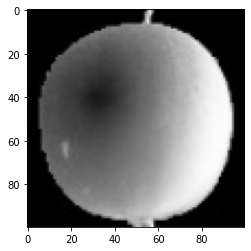

In [12]:
plt.imshow(fruits[0], cmap='gray')
plt.show()

> 첫 번째 이미지는 사과

> 첫 번째 행이 전 장에서 출력한 배열 값

> 0에 가까울수록 검게 나타나고 높은 값은 밝게 표시

우리가 보는 것과 컴퓨터가 처리하는 방식이 다름
  - → 출력할 때 <font color= #F9D923>바탕이 검게</font> 나옴

cmap 매개변수를 '<font color= #F9D923>gray_r</font>'로 지정 → 반전하여 우리 눈에 보기 좋게 출력

- 해당 데이터는 사과, 바나나, 파인애플이 각각 100개씩 들어 있음
- 하지만 특정 이미지가 사과인지, 바나나인지, 파인애플인지는 모름
- 바나나, 파인애플 이미지도 출력 테스트


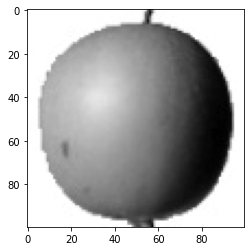

In [13]:
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

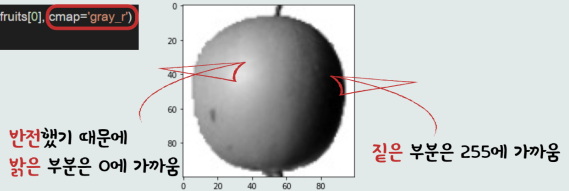

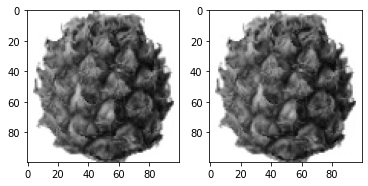

In [14]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[100], cmap='gray_r')
plt.show()

> <font color="#ff0000">subplots()</font>함수
- 여러 개의 그래프를 배열처럼 쌓음
- 두 매개변수는 그래프를 쌓을 행과 열 (1행 2열)

> <font color="#ff0000">fig</font>: 전체 subplot

> <font color="#ff0000">axs</font>: 각각의 subplot
  - axs[0]: 파인애플 이미지
  - axs[1]: 바나나 이미지

## **픽셀값 분석**

1. 100 x 100 이미지를 펼쳐서 <font color= #F9D923>길이가 10,000인 1차원 배열</font>로 만듬(이미지 출력은 어렵지만 배열 계산이 편리)
2. fruits 데이터를 사과, 파인애플, 바나나로 <font color= #F9D923>각각 나눔</font>(예를 위해서 만든 데이타. 실전에서는 알 수 없음)
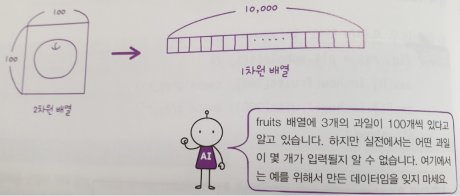

- <font color= #F9D923>슬라이싱</font> 연산자 사용: fruits 배열에서 순서대로 100개씩 선택
  - fruits[0:100] = 0-99까지 100개

- <font color= #F9D923>reshape</font>() 메서드 사용
  - 두 번째 차원(100)과 세 번째 차우너(100)을 10,000으로 합침
  - 첫 번째 차원을 <font color= #F9D923>-1</font>로 지정하면 자동으로 남은 차원 할당

In [15]:
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)
# 사과 배열의 크기
print(apple.shape)

(100, 10000)


> 첫 번째 차원 100은 <font color= #ff0000>샘플 개수</font>

## **히스토그램 시각화**

히스토그램(histogram): <font color= #F9D923>분포 시각화</font>를 잘 알려줌
  - 값이 발생한 <font color= #F9D923>빈도</font>를 그래프로 표시
  - x축이 값의 구간(계급) / y축은 발생 빈도(도수)

matplotlib의 <font color= #F9D923>hist</font>() 함수를 사용해 히스토그램 그리기

사과, 파인애플, 바나나를 모두 겹쳐 그리기
  - → <font color= #F9D923>조금 투명하게</font> 해야 겹친 부눈을 잘 볼 수 있음

- <font color= #F9D923>alpha</font> 매개변수: 투명도 조정 (0으로 갈수록 투명)
- <font color= #F9D923>legend</font>() 함수: 범례 생성

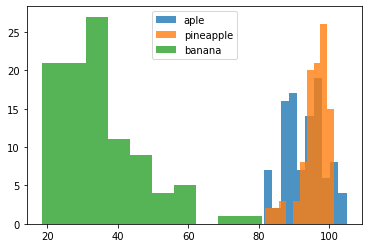

In [16]:
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha = 0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['aple', 'pineapple', 'banana'])
plt.show()

> 바나나 사진의 평균값은 40 아래에 집중

> 사과, 파인애플은 90~100 사이에 집중

> <font color= #ff0000>바나나는 확실히 구분 가능

## **픽셀의 평균 계산**

- 샘플의 평균값이 아니라 픽셀별 평균값 계산
- 전체 샘플에 대해 <font color= #F9D923>각 픽셀의 편균</font> 계산
  - : 세 과일은 모양이 다르기 때문에 <font color= #F9D923>픽셀값이 높은 위치</font>가 조금 다름
- <font color= #F9D923>axis를 0</font>으로 지정
- matplotlib의 <font color= #F9D923>bar</font>() 함수 사용: 픽셀 10,000개에 대한 평균값 <font color= #F9D923>막대그래프</font>
- <font color= #F9D923>subplots</font>() 함수로 3개의 서브그래프 생성

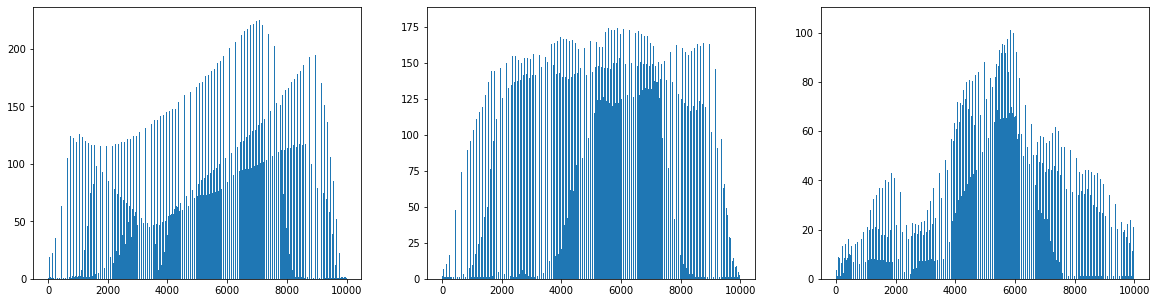

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

> 과일마다 값이 높은 구간이 다름

> 사과: 사진이 아래쪽으로 갈수록 값이 높아짐

> 파인애플: 비교적 고르면서 높음

> 바나나: 중앙의 픽셀값이 높음

## **픽셀의 평균 시각화**

픽셀 평균값을 

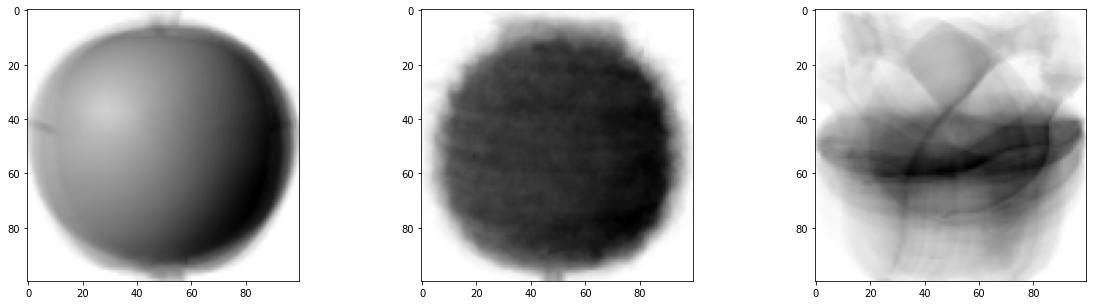

In [20]:
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize = (20, 5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')

> 세 과일은 <font color= #ff0000>픽셀 위치</font>에 따라 값의 크기가 차이남

> <font color= #F9D923>대표 이미지와 가까운</font> 사진을 골라내면 사과, 파인애플, 바나나 <font color= #F9D923>구분 가능</font>?

## **평균값과 가까운 사진 고르기**

- 사과 사진의 평균값인 <font color= #F9D923>apple_mean과 가장 가까운</font> 사진 고르기

- <font color= #F9D923>절댓값 오차</font> 사용
1. fruits 배열의 모든 샘플 - apple_mean의 절댓값 계산
2. 1번의 평균

- 넘파이 <font color= #F9D923>abs</font>() 함수: 절댓값 계산
  예) -5의 절댓값은 5

In [21]:
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1, 2))
print(abs_mean.shape)

(300,)


> 1번 계산하여 <font color= #ff0000>abs_diff</font> 변수에 저장
  : (300, 100, 100)크기의 배열

> 각 샘플(300개)에 대한 평균 구하기 위해 axis를 <font color= #ff0000>2, 3차원</font> 모두 지정 (0, <font color= #ff0000>1, 2</font> 중 1, 2)

> 2번 계산한 <font color= #ff0000>abs_mean</font>은 각 샘플의 오차 평균: (300,)인 1차원 배열

apple_mean과 <font color= #F9D923>가장 오차가 작은</font> 샘플 100개 고르기

<font color= #F9D923>np.argsort()</font> 함수: 작은 것에서 큰 순서대로 나열한 <font color= #F9D923>인덱스</font> 반환

인덱스 중<font color= #F9D923> 처음 100개</font> 선택해 10x10 subplot 이미지 그리기

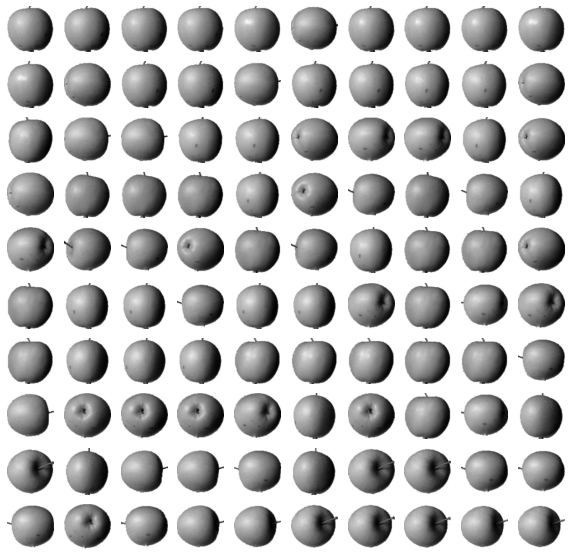

In [22]:
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize = (10, 10))
for i in range(10):
  for j in range(10):
    axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
    axs[i, j].axis('off')
plt.show()

> <font color= #ff0000>슬라이싱[:100]</font>으로 초반 100개 고름

> <font color= #ff0000>전체 10x10 subplot</font> 만들고 size도 10x10

> <font color= #ff0000>이중 for문</font>: i가 #일때 j는 0-9 반복

> index[<font color= #ff0000>i*10 + j</font>]:
  i가 0일때 0, 1, 2, 3, ~, 9
  i가 1일때 10, 11, 12, 13, ~, 19
  i가 2일때 20, 21, 22, 23, ~, 29

> <font color= #ff0000>axis('off')</font>: 좌표축 안 보이게(이미지만)


apple_mean과 <font color= #F9D923>가장 오차가 작은</font> 샘플 100개 시각화

모두 사과! 성공!

<font color= #F9D923>군집</font>(clustering)
  - 비슷한 샘플끼리 그룹으로 모으는 작업
  - 대표적인 비지도 학습

<font color= #F9D923>클러스터</font>(cluster): 군집 알고리즘에서 만든 그룹
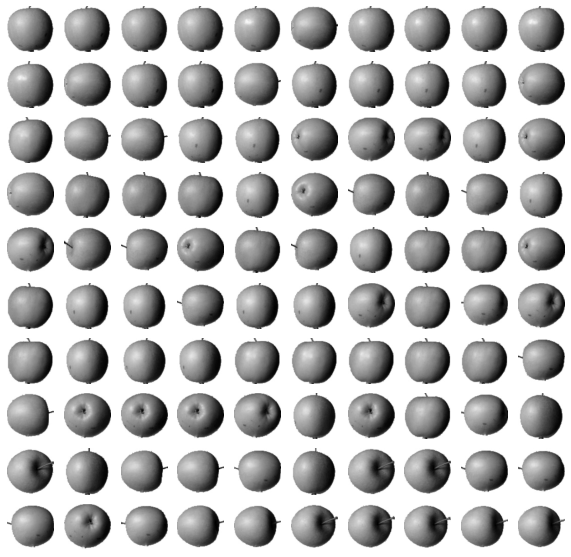

---

## **문제점**

- 우리는 이미 사과, 파인애플, 바나나가 있다는 것을 알고 있었음
- <font color= #F9D923>타깃값을 알고 있었기에</font> 사진 평균값 계산 가능</font>
- 이를 가지고 가장 가까운 과일 찾기 가능
- <font color= #ff0000>실제 비지도 학습에서는 타깃이 없는 사진 사용</font>